In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
df = pd.read_csv('Cars-RF.csv')

In [56]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [57]:
column_names = ['Class Values', 'buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
df = pd.read_csv('Cars-RF.csv', names=column_names)

In [58]:
df

,Class Values,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Class Values  1728 non-null   object
 1   buying        1728 non-null   object
 2   maint         1728 non-null   object
 3   doors         1728 non-null   object
 4   persons       1728 non-null   object
 5   lug_boot      1728 non-null   object
 6   safety        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [60]:
df.describe()

,Class Values,buying,maint,doors,persons,lug_boot,safety
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [61]:
categorical_columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'Class Values']
for col in categorical_columns:
    print(df[col].value_counts())



vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
2        432
3        432
4        432
5more    432
Name: maint, dtype: int64
2       576
4       576
more    576
Name: doors, dtype: int64
small    576
med      576
big      576
Name: persons, dtype: int64
low     576
med     576
high    576
Name: lug_boot, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: safety, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: Class Values, dtype: int64


In [62]:
print(df.isnull().sum())

Class Values    0
buying          0
maint           0
doors           0
persons         0
lug_boot        0
safety          0
dtype: int64


In [63]:
from sklearn.model_selection import train_test_split

X = df.drop('Class Values', axis=1)
y = df['Class Values']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X_train = ordinal_encoder.fit_transform(X_train)
X_test= ordinal_encoder.transform(X_test)

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
y_pred = rf.predict(X_test)


In [67]:
from sklearn.metrics import accuracy_score
acc_default = accuracy_score(y_test, y_pred)
print("Accuracy default:", acc_default)

Accuracy default: 0.07225433526011561


In [68]:
rf1 = RandomForestClassifier(n_estimators=500, random_state=42)
rf1.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500, random_state=42)

In [69]:
y_pred1 = rf.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score
acc_default1 = accuracy_score(y_test, y_pred1)
print("Accuracy n parameters:", acc_default1)

Accuracy n parameters: 0.07225433526011561


In [71]:
feature_importance = rf1.feature_importances_
print("Feature Importance Scores:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importance[i]}")


Feature Importance Scores:
buying: 0.25268192147051993
maint: 0.2117763942362642
doors: 0.12553534280748907
persons: 0.14425398591015426
lug_boot: 0.1168174778400139
safety: 0.14893487773555864


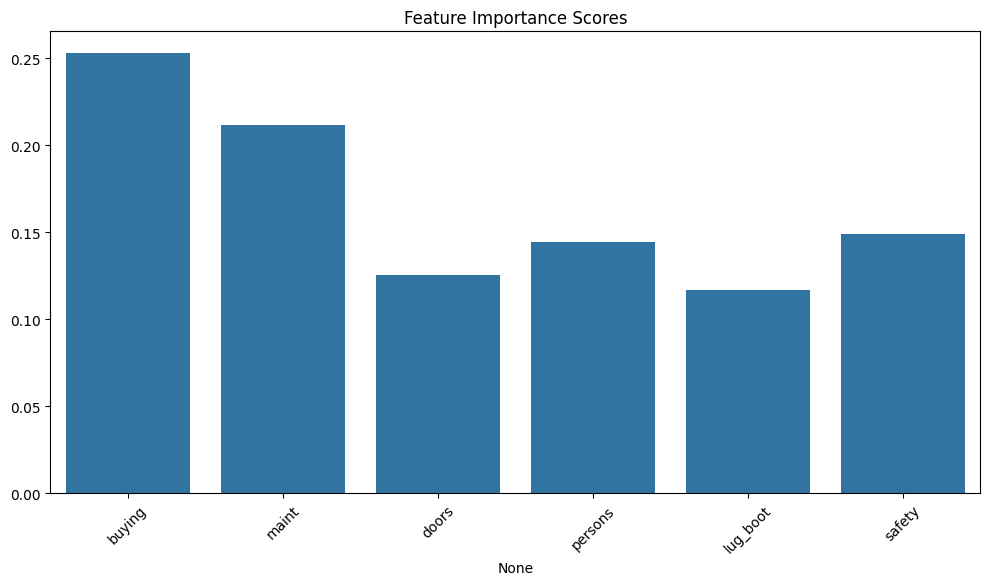

In [72]:
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.barplot(x=X.columns, y=feature_importance)
plt.title("Feature Importance Scores")
plt.xticks(rotation=45)
plt.show()
